<a href="https://colab.research.google.com/github/rishabhjais1701/Strategic-Marketing-for-Personal-Loans/blob/main/Strategic_Marketing_for_Personal_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MODULE 1

####*In Module 1, we start by loading and inspecting the personal loan dataset, focusing on cleaning and preparing the data. We remove duplicates, check for anomalies, and conduct basic exploratory data analysis (EDA) to uncover initial insights. This ensures the dataset is reliable and ready for deeper analysis, supporting effective data-driven marketing strategies*

In [76]:
# Task 1: Load and inspect the dataset
# Import necessary libraries

import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Get the filename from the uploaded files
filename = next(iter(uploaded))  # Assuming you uploaded a single file

# Load the dataset
df = pd.read_csv(filename) # Use the uploaded filename

# Inspect the dataset
df.head()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (5).csv


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [77]:
# Task 2: Identify and remove duplicates
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()

# Display the number of duplicates
print(f'Number of duplicate records: {duplicates}')

Number of duplicate records: 0


In [78]:
# Task 3: Handle missing values
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

# If there are missing values, you can decide to fill them or drop rows/columns
# Example: Fill missing values with the mean (if numeric)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)



Missing values in each column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


Summary statistics of the dataset:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802    

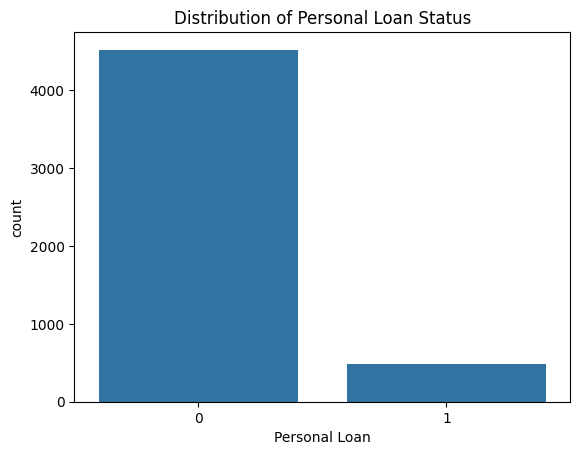

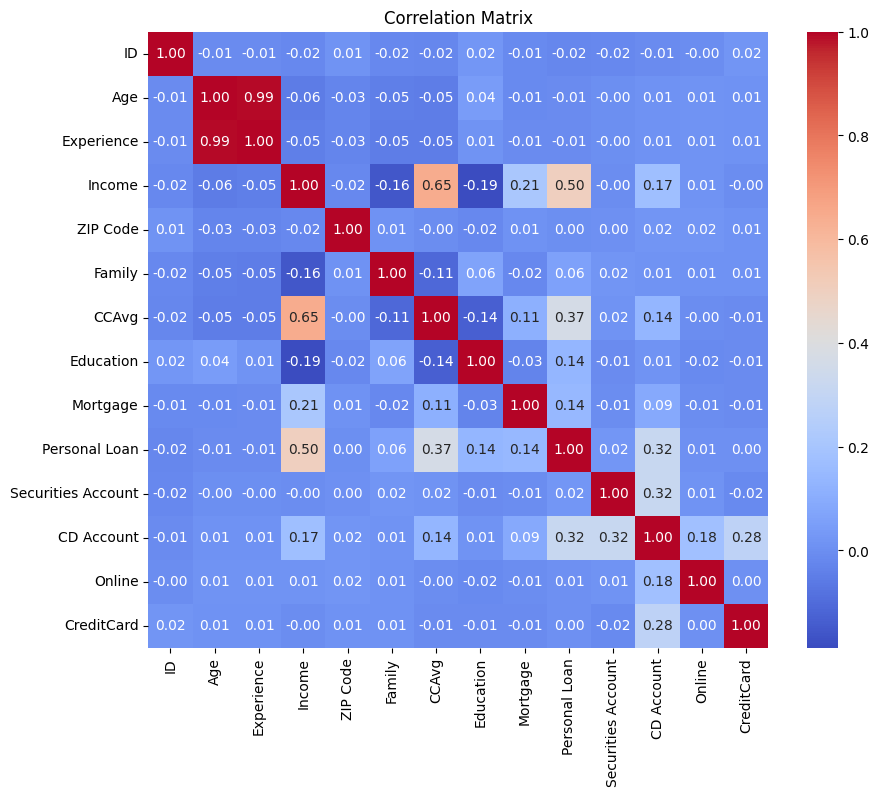

In [79]:
# Task 4: Summary statistics
# Generate basic summary statistics for the dataset
summary_statistics = df.describe()

# Display the summary statistics
print("Summary statistics of the dataset:")
print(summary_statistics)

# Task 4: Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of personal loan status
sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Personal Loan Status')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [80]:
# Task 5: Feature engineering
# Example: Create a new feature based on existing data
df['Income_to_Age_Ratio'] = df['Income'] / df['Age']

# Display the first few rows to check the new feature
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_to_Age_Ratio
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.960000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.755556
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.282051
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2.857143
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1.285714


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Define features and target variable
X = df.drop('Personal Loan', axis=1)  # Features
y = df['Personal Loan']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 95.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.86      0.64      0.73       157

    accuracy                           0.95      1500
   macro avg       0.91      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



## Module 2
####*Module 2 focuses on refining the dataset further by addressing data inconsistencies and conducting more detailed exploratory data analysis (EDA). The goal is to detect and correct any anomalies, such as missing values or outliers, ensuring that the dataset is accurate and reliable. This module sets the stage for building predictive models and deriving actionable insights.*

In [82]:
# Task 1: Transforming Education Levels
# Code transforms the 'Education' column into categories: 'Undergraduate,' 'Graduate,' and 'Professional.'

def edu(x):
    if x==1:
        return "Undergraduate"
    elif x==2:
        return "Graduate"
    else:
        return "Professional"

df['EDU'] = df['Education'].apply(edu)

In [83]:
# Task 2: Categorizing Account Holders
# Code categorizes account holders based on their financial choices, such as holding securities or deposits.

def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Deposits"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securities & Deposits account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Securities account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposits account"

df['Account_holder_category'] = df.apply(security, axis=1)

In [84]:
# Task 3: Archiving the Transformed Data
# Code saves the cleaned and transformed dataset to a CSV file named 'liability.csv.'

df.to_csv('liability.csv', index=False)
# Inspect the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_to_Age_Ratio,EDU,Account_holder_category
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.960000,Undergraduate,Holds only Securities account
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.755556,Undergraduate,Holds only Securities account
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.282051,Undergraduate,Does not hold Securities & Deposits account
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2.857143,Graduate,Does not hold Securities & Deposits account
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1.285714,Graduate,Does not hold Securities & Deposits account


## Module 3
####*Module 3 focuses on the multiple query which is gonna execute to give output.*

In [85]:
import pandas as pd
from google.colab import files
from tabulate import tabulate

# Step 1: Upload the dataset
uploaded = files.upload()

# Assuming the uploaded file is named 'liability.csv'
file_path = next(iter(uploaded.keys()))
liability_df = pd.read_csv(file_path)

# Queries
query1 = liability_df
query2 = liability_df.shape[0]
query3 = liability_df['Income'].mean()
query4 = liability_df.sort_values(by='Income', ascending=False).head(10)
query5 = liability_df.groupby('EDU')['Income'].mean().reset_index()
liability_df['IncomeRank'] = liability_df.groupby('EDU')['Income'].rank(ascending=False, method='dense')
query6 = liability_df[liability_df['IncomeRank'] <= 2]

query7 = liability_df.copy()
query7['AgeGroup'] = pd.cut(query7['Age'], bins=[18, 30, 45, 60, float('inf')], labels=['18-30', '31-45', '46-60', '61+'])
query7 = query7.groupby('AgeGroup', observed=False).size().reset_index(name='RecordCount')

ccavg_mean = liability_df['CCAvg'].mean()
query8 = liability_df[liability_df['CCAvg'] > ccavg_mean]['Age'].mean()
income_mean = liability_df['Income'].mean()
query9 = liability_df[liability_df['Income'] > 1.5 * income_mean]
query10 = liability_df.groupby('Family')['Age'].min().reset_index()
query11 = liability_df[liability_df['Mortgage'] > 0]

# Output the results
print("="*60)
print("1. First few rows of the dataset:")
print(tabulate(query1.head(), headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("2. Total number of records:", query2)

print("\n" + "="*60)
print("3. Average Income:")
print(f"${query3:.2f}")

print("\n" + "="*60)
print("4. Top 10 records by Income:")
print(tabulate(query4, headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("5. Average Income by Education Level:")
print(tabulate(query5, headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("6. Top 2 incomes per Education Level:")
print(tabulate(query6, headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("7. Age Group Distribution:")
print(tabulate(query7, headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("8. Average Age where CCAvg is above average:")
print(f"{query8:.2f} years")

print("\n" + "="*60)
print("9. Records with Income greater than 1.5 times the average:")
print(tabulate(query9.head(), headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("10. Youngest Age per Family Size:")
print(tabulate(query10, headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*60)
print("11. Records with Mortgage greater than 0:")
print(tabulate(query11.head(), headers='keys', tablefmt='fancy_grid'))


Saving liability.csv to liability (10).csv
1. First few rows of the dataset:
╒════╤═══════╤══════════════╤══════════╤══════════╤═════════╤═════════════╤════════════╤═════════════════╤══════════════════════╤══════════════╤══════════╤══════════════╤═══════════════╤═════════════════════════════════════════════╤══════════════╕
│    │   Age │   Experience │   Income │   Family │   CCAvg │   Education │   Mortgage │   Personal Loan │   Securities Account │   CD Account │   Online │   CreditCard │ EDU           │ Account_holder_category                     │   IncomeRank │
╞════╪═══════╪══════════════╪══════════╪══════════╪═════════╪═════════════╪════════════╪═════════════════╪══════════════════════╪══════════════╪══════════╪══════════════╪═══════════════╪═════════════════════════════════════════════╪══════════════╡
│  0 │    25 │            1 │       49 │        4 │     1.6 │           1 │          0 │               0 │                    1 │            0 │        0 │            0 │ Undergra